# Task1   Data Acquisition

Data acquisition is a process of loading and reading data from various sources. We will learn how to export and read data from a local file in different format using  **Pandas** package. 

A file format is a standardised way in which information is encoded to be stored in a file. Some examples of file formats are: CSV, XLSX, and PKL. 

### pickle — Python object serialization

This data format is Python-specific. This has the advantage that there are no restrictions imposed by external standards; however it means that non-Python programs may not be able to reconstruct pickled Python objects.


In [25]:
import os
import csv
import urllib

import pandas as pd
import numpy as np
import datetime
from alpha_vantage.timeseries import TimeSeries
from covid19dh import covid19
import requests
import matplotlib.pyplot as plt
import dataframe_image as dfi
import pickle
import seaborn as sn
from scipy import stats

import time


### How to make a request in python?
There are many different way to request data. 
In the following, we will use the package **urllib** that collects several modules for working with URLs.

In particular, [urlib.request](https://docs.python.org/3/library/urllib.request.html#module-urllib.request) is a module for opening and reading URLs.

### - Download climate data


The following functions allow to download and store the dataset in a specific folder.

How to use:

- Set the source (i.e., URL) of the desidered dataset in `data_url`.
- Set the `data_dir` variable with the local directory where to store the data.
- Call `download_and_extract()` to download the dataset if it is not already located in the given data_dir.
- Load the data in the interactive Python notebook so it can be used in your scripts (you can use `load_original_data()`).

In [3]:
api_key='B1Q551T88OEDZJ52'

In [3]:
api_key='B1Q551T88OEDZJ52'
def acquire_stock_data():
    ts = TimeSeries (key=api_key, output_format = "pandas")
    data_daily, meta_data = ts.get_daily_adjusted(symbol='AAPL', outputsize ='full')

    start_date = datetime.datetime(2017, 4, 1)
    end_date = datetime.datetime(2022, 4, 30)

    # Create a filtered dataframe, and change the order it is displayed. 
    stock_data = data_daily[(data_daily.index > start_date) & (data_daily.index <= end_date)]
    stock_data = stock_data.sort_index(ascending=True)
    #date_filter

    stock_data = stock_data.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Original Close',
                                '5. adjusted close': 'Close', '6. volume': 'Volume', '7. dividend amount': 'Dividend',
                                '8. split coefficient': 'Split'})
    return stock_data
#type(date_filter)

In [4]:

ts = TimeSeries (key=api_key, output_format = "pandas")
data_daily, meta_data = ts.get_daily_adjusted(symbol='AAPL', outputsize ='full')

start_date = datetime.datetime(2017, 4, 1)
end_date = datetime.datetime(2022, 4, 30)

# Create a filtered dataframe, and change the order it is displayed. 
stock_data = data_daily[(data_daily.index > start_date) & (data_daily.index <= end_date)]
stock_data = stock_data.sort_index(ascending=True)
#date_filter
stock_data = stock_data.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Original Close',
                                '5. adjusted close': 'Close', '6. volume': 'Volume', '7. dividend amount': 'Dividend',
                                '8. split coefficient': 'Split'})
stock_data


,Open,High,Low,Original Close,Close,Volume,Dividend,Split
date,,,,,,,,
2017-04-03,143.71,144.120,143.05,143.70,33.718447,19985714.0,0.0,1.0
2017-04-04,143.25,144.890,143.17,144.77,33.969517,19891354.0,0.0,1.0
2017-04-05,144.22,145.460,143.81,144.02,33.793534,27717854.0,0.0,1.0
2017-04-06,144.29,144.520,143.45,143.66,33.709062,21149034.0,0.0,1.0
2017-04-07,143.73,144.180,143.27,143.34,33.633975,16658543.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-04-25,161.12,163.170,158.46,162.88,161.942007,96046376.0,0.0,1.0
2022-04-26,162.25,162.340,156.72,156.80,155.897020,94008394.0,0.0,1.0
2022-04-27,155.91,159.790,155.38,156.57,155.668345,88063191.0,0.0,1.0


In [5]:
import pickle
stock_data.to_pickle('AAPL_stock_data.pkl')
stock_data.to_csv('AAPL_stock_data.csv')

In [71]:
'''download and save csv files'''
def download_save_csv(url,filename):
    """ To download and save .csv file according to url and save path"""
    data_dir='./Dataset'
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)    
    #file_path=data_dir+'/'+filename+'.csv'
    #if not os.path.exists(file_path):
       # file_path, headers = urllib.request.urlretrieve(url,file_path)   
    #return file_path

# COVID_url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
# Cases_Path= download_save_csv(COVID_url,'cases')

# #https://ghoapi.azureedge.net/api/WHOSIS_000001?$filter=Dim1 eq 'MLE' and date(TimeDimensionBegin) ge 2011-01-01 and date(TimeDimensionBegin) lt 2012-01-01
# COVID_filter="https://ghoapi.azureedge.net/api/WHOSIS_000001?$filter=Dim1 eq 'MLE' and date(TimeDimensionBegin) ge 2011-01-01 and date(TimeDimensionBegin) lt 2012-01-01"
# Cases_Path= download_save_csv(COVID_url,'filter')

# europe_countries = {} #dict
# for i in locations_json[1]:
#   if i["region"]["id"] == "ECS":
#     europe_countries[i["id"]] = i["name"]

# url_1="http://apps.who.int/gho/athena/api/GHO/WHOSIS_000001?filter=COUNTRY:BWA;YEAR:2011;SEX:BTSX"
# Cases_Path= download_save_csv(COVID_url,'filter_2')

In [85]:
# def acquire_covid_data():
# base_dir = './Datasets'
 
#     # Get the data
#     dataframe, src = covid19(raw=True)
#     # Create the path where to save the data
#     dataframe_path = os.path.join(base_dir, f'{filename}.pkl')
#     # Save the dataset in a pickle file
#     pd.to_pickle(dataframe, dataframe_path)
#     return dataframe_path


In [6]:
'''Covid Data'''
base_dir='./Datasets'
df_covid,src=covid19('USA',start=start_date,end=end_date)
filename='Covid'
dataframe_path = os.path.join(base_dir, f'{filename}.pkl')
# Save the dataset in a pickle file
pd.to_pickle(df_covid, dataframe_path)
df_covid.to_csv(os.path.join(base_dir, f'{filename}.csv'))

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


/Users/xumujie/miniforge3/envs/python39/lib/python3.9/site-packages/covid19dh/_cite.py:69: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for iso,country in x.groupby(["iso_alpha_3"]):
/Users/xumujie/miniforge3/envs/python39/lib/python3.9/site-packages/covid19dh/_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
/Users/xumujie/miniforge3/envs/python39/lib/python3.9/site-packages/covid19dh/_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)


In [7]:
#cash flow
from alpha_vantage.fundamentaldata import FundamentalData
url_cashflow="https://www.alphavantage.co/query?function=CASH_FLOW&symbol=IBM&apikey=demo"

fd= FundamentalData(key=api_key,output_format='pandas')
data_cashflow=fd.get_income_statement_quarterly('AAPL')
data_cashflow[0]
# Create a filtered dataframe, and change the order it is displayed. 
# date_cashflow = data_daily[(data_daily.index > start_date) & (data_daily.index <= end_date)]
# date_filter = date_filter.sort_index(ascending=True)
# #date_filter

# date_filter = date_filter.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Original Close',
#                             '5. adjusted close': 'Close', '6. volume': 'Volume', '7. dividend amount': 'Dividend',
#                             '8. split coefficient': 'Split'})
# date_filter
# #type(date_filter)

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,2022-09-30,USD,38095000000,89319000000,58491000000,52051000000,24894000000,6440000000,6761000000,13201000000,...,None,2865000000,24657000000,3936000000,827000000,20721000000,18909000000,25484000000,28349000000,20721000000
1970-01-01 00:00:00.000000001,2022-06-30,USD,35885000000,82240000000,53086000000,47074000000,23076000000,6012000000,6797000000,12809000000,...,None,2805000000,23066000000,3624000000,719000000,19442000000,16639000000,23785000000,26590000000,19442000000
1970-01-01 00:00:00.000000002,2022-03-31,USD,42559000000,96587000000,60912000000,54719000000,29979000000,6193000000,6387000000,12580000000,...,None,2737000000,30139000000,5129000000,691000000,25010000000,19443000000,30830000000,33567000000,25010000000
1970-01-01 00:00:00.000000003,2021-12-31,USD,54243000000,123251000000,76151000000,69702000000,41488000000,6449000000,6306000000,12755000000,...,None,2697000000,41241000000,6611000000,694000000,34630000000,33540000000,41935000000,44632000000,34630000000
1970-01-01 00:00:00.000000004,2021-09-30,USD,35174000000,82688000000,53802000000,48186000000,23786000000,5616000000,5772000000,11388000000,...,None,2989000000,23248000000,2697000000,672000000,20551000000,20656000000,23920000000,26909000000,20551000000
1970-01-01 00:00:00.000000005,2021-06-30,USD,35255000000,80769000000,51591000000,46179000000,24126000000,5412000000,5717000000,11129000000,...,None,2832000000,24369000000,2625000000,665000000,21744000000,22088000000,25034000000,27866000000,21744000000
1970-01-01 00:00:00.000000006,2021-03-31,USD,38079000000,88914000000,56819000000,51505000000,27503000000,5314000000,5262000000,10576000000,...,None,2797000000,28011000000,4381000000,670000000,23630000000,23165000000,28681000000,31478000000,23630000000
1970-01-01 00:00:00.000000007,2020-12-31,USD,44328000000,110801000000,72742000000,67111000000,33534000000,5631000000,5163000000,10794000000,...,None,2666000000,33579000000,4824000000,638000000,28755000000,29340000000,34217000000,36883000000,28755000000
1970-01-01 00:00:00.000000008,2020-09-30,USD,24689000000,64698000000,44945000000,40009000000,14775000000,4936000000,4978000000,9914000000,...,None,2702000000,14901000000,2228000000,634000000,24689000000,12817000000,15535000000,18237000000,12673000000


In [127]:
# weather_api='3e041a73d53777caf9b801181095ca20'
# weather_base_url="http://api.openweathermap.org/data/2.5/weather?"
# city_names=['New York','Los Angeles','Chicago','Houston','Phoenix','Philadelphia','San Antonio','San Diego']
# for i in city_names:
#     weather_url=weather_base_url+"appid="+weather_api+"&q="+i 
#     response=requests.get(weather_url).json()
#     # print(response)
# print(response)

# balance_sheet = pd.DataFrame.from_dict(response)
# weather_base_url="http://api.openweathermap.org/data/2.5/history/city?"
# weather_ids = list(response.keys())
# timeSelection = (datetime.datetime(2017, 4, 1), datetime.datetime(2022, 4, 30))
# for country in weather_ids:
#   try:
#       print('Saving {} data'.format(country))
#       energy_data = wb.get_dataframe({'3.1_RE.CONSUMPTION' : 'Renewable energy consumption (TJ)'}, data_date=timeSelection, country=country)
#       energy_data.to_csv(europe_countries[country] + '_REC_2006_2016.csv')
#   except Exception as e:
#     print(e)


# # weather_url=weather_base_url+"lat="+

# # https://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&end={end}&appid={API key}
# #weather_data = pd.DataFrame.from_dict(response)
# # response_ids=list(response.keys())
# # timeSelection = (datetime.datetime(2017, 4, 1), datetime.datetime(2022, 4, 30))


New York
Los Angeles
Chicago
Houston
Phoenix
Philadelphia
San Antonio
San Diego
{'coord': {'lon': -117.1573, 'lat': 32.7153}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 288.58, 'feels_like': 288.14, 'temp_min': 285.79, 'temp_max': 290.28, 'pressure': 1012, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 4.02, 'deg': 276, 'gust': 4.47}, 'clouds': {'all': 75}, 'dt': 1673817400, 'sys': {'type': 2, 'id': 2005032, 'country': 'US', 'sunrise': 1673794254, 'sunset': 1673831081}, 'timezone': -28800, 'id': 5391811, 'name': 'San Diego', 'cod': 200}


In [8]:
# Create Point by setting the coordinates for London.
from meteostat import Point
from meteostat import Daily
# -122.00941 纬度:37.33509
location = Point(37.323,-122.032,70)
#coordinates = {'ATL':[33.63, -84.42], 'DFW':[32.89, -97.04], 'DEN':[39.85, -104.67], 'ORD':[41.97, -87.90], 'LAX':[33.94, -118.42]}
data = Daily(location, start_date, end_date)
cupertino_weather = data.fetch()
cupertino_weather.to_csv("Cupertino_Weather_2017_2022.csv")
cupertino_weather.to_pickle("Cupertino_Weather_2017_2022.pkl")


In [ ]:
def acquire():
    import os
    import sys

    import csv
    import urllib

    import pandas_datareader.data as web
    import pandas as pd
    import numpy as np
    import datetime

    def download_save_csv(url,filename):
        """ To download and save .csv file according to url and save path"""
        data_dir='./Dataset'
        if not os.path.exists(data_dir):
            os.makedirs(data_dir)    
        file_path=data_dir+'/'+filename+'.csv'
        if not os.path.exists(file_path):
            file_path, headers = urllib.request.urlretrieve(url,file_path)   
        return file_path

    stock_url = 'https://query1.finance.yahoo.com/v7/finance/download/AAL?period1=1491004800&period2=1619827200&interval=1d&events=history&includeAdjustedClose=true'
    stock_Path=download_save_csv(stock_url,'stock')
    stock=pd.read_csv(stock_Path,parse_dates=True) 

    COVID_url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
    Cases_Path= download_save_csv(COVID_url,'cases')
    Cases=pd.read_csv(Cases_Path,parse_dates=True)  
    caseUS=Cases.loc[Cases["Country_code"] == "US"]
    Cases.shape[0]
    Cases.dtypes
    
    Precipitation_url = "https://www.ncdc.noaa.gov/cag/national/time-series/110-pcp-all-12-2017-2021.csv?base_prd=true&begbaseyear=2017&endbaseyear=2021"
    Precip_Path = download_save_csv(Precipitation_url ,'Precip')
    Precip=pd.read_csv(Precip_Path,skiprows=[0,1,2,3], parse_dates=True,infer_datetime_format=True,date_parser=True)
    Precip.shape[0]
    Precip.dtypes
    
    startDate=datetime.datetime(2017,4,1)
    endDate=datetime.datetime(2021,5,31)
    Stock =web.DataReader("AAL","yahoo",startDate,endDate)
    Stock.to_csv('./Dataset/Stock.csv',index=True, header=True)

    startDate=datetime.datetime(2017,4,1)
    endDate=datetime.datetime(2021,5,31)
    Oil =web.DataReader("CL=F","yahoo",startDate,endDate)
    Oil.to_csv('./Dataset/Oil.csv',index=True, header=True) 

    startDate=datetime.datetime(2017,4,1)
    endDate=datetime.datetime(2021,5,31)
    NASDAQ =web.DataReader("^IXIC","yahoo",startDate,endDate)
    NASDAQ.to_csv('./Dataset/NASDAQ.csv',index=True, header=True) 
    print('task1 succeed')
    return Stock,Oil, NASDAQ,caseUS,Precip

# Data Preprocessing

- 1. Data cleaning

Missing data: GDP and revenue are not stored by day, so I copy the data for everyday in a month/quarter. All data are stored in 'multidata.csv'.

Outliers: I plot the box diagrams of three datasets (will be shown in task 4), which show that there're no outliers.

- 2. Data visualization

I plot three datasets directly. General trend can be shown in the pictures.

- 3. Data transformation

I did data normalization in this part. As magnitudes of all datasets are different.

In [9]:
stock_data

,Open,High,Low,Original Close,Close,Volume,Dividend,Split
date,,,,,,,,
2017-04-03,143.71,144.120,143.05,143.70,33.718447,19985714.0,0.0,1.0
2017-04-04,143.25,144.890,143.17,144.77,33.969517,19891354.0,0.0,1.0
2017-04-05,144.22,145.460,143.81,144.02,33.793534,27717854.0,0.0,1.0
2017-04-06,144.29,144.520,143.45,143.66,33.709062,21149034.0,0.0,1.0
2017-04-07,143.73,144.180,143.27,143.34,33.633975,16658543.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-04-25,161.12,163.170,158.46,162.88,161.942007,96046376.0,0.0,1.0
2022-04-26,162.25,162.340,156.72,156.80,155.897020,94008394.0,0.0,1.0
2022-04-27,155.91,159.790,155.38,156.57,155.668345,88063191.0,0.0,1.0


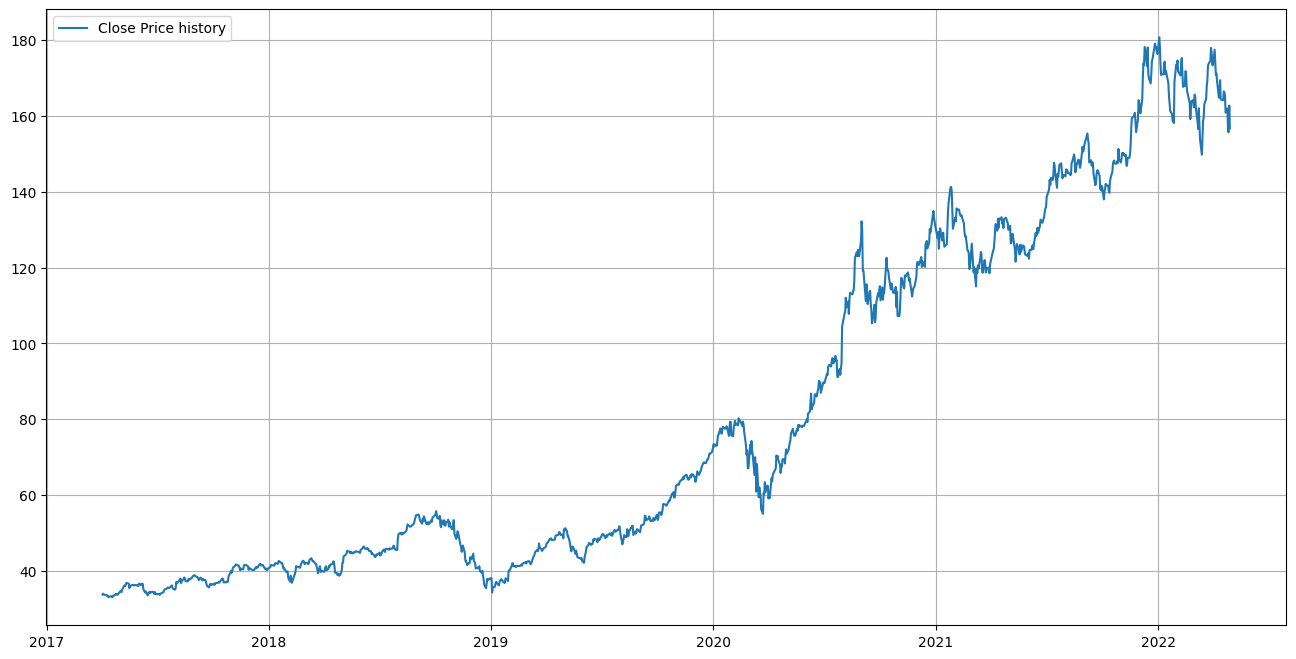

In [10]:
price=stock_data['Close']
plt.figure(figsize=(16,8))
plt.plot(price, label='Close Price history')
plt.legend()
plt.grid()
plt.savefig('price.jpg')

In [213]:
stock_data

,Open,High,Low,Original Close,Close,Volume,Dividend,Split
date,,,,,,,,
2017-04-03,143.71,144.120,143.05,143.70,33.718447,19985714.0,0.0,1.0
2017-04-04,143.25,144.890,143.17,144.77,33.969517,19891354.0,0.0,1.0
2017-04-05,144.22,145.460,143.81,144.02,33.793534,27717854.0,0.0,1.0
2017-04-06,144.29,144.520,143.45,143.66,33.709062,21149034.0,0.0,1.0
2017-04-07,143.73,144.180,143.27,143.34,33.633975,16658543.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-04-25,161.12,163.170,158.46,162.88,161.942007,96046376.0,0.0,1.0
2022-04-26,162.25,162.340,156.72,156.80,155.897020,94008394.0,0.0,1.0
2022-04-27,155.91,159.790,155.38,156.57,155.668345,88063191.0,0.0,1.0


In [28]:
price=stock_data['Close']
day=price.resample('D').asfreq()
day[:10]

stock_path=open('./Datasets/AAPL_stock_data','rb')
stock_time_series=pickle.load(stock_path)

FileNotFoundError: [Errno 2] No such file or directory: './Datasets/AAPL_stock_data'

In [31]:
res=open('./Datasets/AAPL_stock_data.pkl','rb')
stock_time_series=pickle.load(res)
stock_time_series.drop(['Open','High','Low','Volume','Dividend','Split','Original Close'],axis=1)
stock_time_series.to_csv('AAPL_stock_data_preprocessed.csv')
stock_time_series.to_pickle('AAPL_stock_data_preprocessed.pkl')
#time_series = pickle.load('./Datasets/AAPL_stock_data.pkl','rb')
#time_series.drop(['Dividend', 'Split', 'Original Close'], axis=1)

In [21]:
covid_path=open('./Datasets/Covid.pkl','rb')
covid_time_series=pickle.load(covid_path)
covid_time_series=covid_time_series[['date', 'confirmed', 'recovered', 'deaths']]
covid_time_series

,date,confirmed,recovered,deaths
43927,2020-01-21,1.0,NaN,0.0
43928,2020-01-22,1.0,NaN,0.0
43929,2020-01-23,1.0,NaN,0.0
43930,2020-01-24,2.0,NaN,0.0
43931,2020-01-25,3.0,NaN,0.0
...,...,...,...,...
44753,2022-04-26,80996837.0,NaN,990368.0
44754,2022-04-27,81081307.0,NaN,991039.0
44755,2022-04-28,81154876.0,NaN,991502.0
44756,2022-04-29,81236707.0,NaN,991921.0


In [22]:
covid_time_series.set_index('date',inplace=True)
covid_time_series


,confirmed,recovered,deaths
date,,,
2020-01-21,1.0,NaN,0.0
2020-01-22,1.0,NaN,0.0
2020-01-23,1.0,NaN,0.0
2020-01-24,2.0,NaN,0.0
2020-01-25,3.0,NaN,0.0
...,...,...,...
2022-04-26,80996837.0,NaN,990368.0
2022-04-27,81081307.0,NaN,991039.0
2022-04-28,81154876.0,NaN,991502.0


In [27]:
covid_time_series.to_pickle('covid_time_preprocessed.pkl')
covid_time_series.to_csv('covid_time_preprocessed.csv')

In [12]:
weather_path=open('Cupertino_Weather_2017_2022.pkl','rb')
weather_time_series=pickle.load(weather_path)
weather_time_series
# weather_time_series.set_index('time',inplace=True)
# weather_time_series
#weather_time_series=weather_time_series[['date', 'confirmed', 'recovered', 'deaths']]

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2017-04-01,17.4,9.7,25.3,0.0,0.0,NaN,7.5,NaN,1015.7,NaN
2017-04-02,16.8,10.3,24.7,0.0,0.0,NaN,10.2,NaN,1015.3,NaN
2017-04-03,15.4,9.7,21.9,0.0,0.0,NaN,11.8,NaN,1014.9,NaN
2017-04-04,15.2,7.5,23.0,0.0,0.0,NaN,8.7,NaN,1016.5,NaN
2017-04-05,17.4,11.9,24.1,0.0,0.0,NaN,8.4,NaN,1016.3,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-26,14.4,10.8,19.1,0.0,NaN,357.0,13.1,NaN,1016.6,NaN
2022-04-27,12.8,6.9,19.1,0.0,NaN,329.0,13.8,NaN,1016.6,NaN
2022-04-28,12.8,8.6,17.5,0.0,NaN,320.0,17.4,NaN,1019.0,NaN


In [13]:
if "snow" not in weather_time_series.columns:
    weather_time_series.fillna(weather_time_series.mean(), inplace = True)

# Now the Weather.
if "snow" in weather_time_series.columns:
    weather_time_series.drop("tsun", axis = 1, inplace = True)# Drop as it has all null values.
    normal_cols = ["tavg", "tmin", "tmax", "prcp", "wdir", "wspd", "pres"]   
    for col in normal_cols:
        weather_time_series[col].fillna(weather_time_series[col].mean(), inplace = True)



In [14]:
print(weather_time_series)


            tavg  tmin  tmax  prcp  snow        wdir  wspd  wpgt    pres
time                                                                    
2017-04-01  17.4   9.7  25.3   0.0   0.0  275.885621   7.5   NaN  1015.7
2017-04-02  16.8  10.3  24.7   0.0   0.0  275.885621  10.2   NaN  1015.3
2017-04-03  15.4   9.7  21.9   0.0   0.0  275.885621  11.8   NaN  1014.9
2017-04-04  15.2   7.5  23.0   0.0   0.0  275.885621   8.7   NaN  1016.5
2017-04-05  17.4  11.9  24.1   0.0   0.0  275.885621   8.4   NaN  1016.3
...          ...   ...   ...   ...   ...         ...   ...   ...     ...
2022-04-26  14.4  10.8  19.1   0.0   NaN  357.000000  13.1   NaN  1016.6
2022-04-27  12.8   6.9  19.1   0.0   NaN  329.000000  13.8   NaN  1016.6
2022-04-28  12.8   8.6  17.5   0.0   NaN  320.000000  17.4   NaN  1019.0
2022-04-29  14.3   6.9  23.0   0.0   NaN  347.000000  11.1   NaN  1019.7
2022-04-30  14.8   9.7  21.9   0.0   NaN  348.000000  12.3   NaN  1017.2

[1856 rows x 9 columns]


In [26]:
weather_time_series.to_pickle('Cupertino_weather_preprocessed_2017_22.pkl')
weather_time_series.to_csv('Cupertino_weather_preprocessed_2017_22.csv')

In [41]:
covid_time_series.index
# covid_time_series.index = pd.to_datetime(covid_time_series.index)
# covid_time_serie

Int64Index([47092, 47093, 47094, 47095, 47096, 47097, 47098, 47099, 47100,
            47101,
            ...
            47913, 47914, 47915, 47916, 47917, 47918, 47919, 47920, 47921,
            47922],
           dtype='int64', length=831)

In [ ]:
price=stock_data['Close']

In [29]:
image_dir='./image/Data Preprocessing/outliers'

day=stock_data.reset_index()
data=np.array(Data).reshape(1,len(day))[0]
day=np.array(day.iloc[:,0])
day=day.reshape(1,len(day))[0]
z = np.abs(stats.zscore(data))
threshold = 3
loc = np.where(z > threshold)
outlier = data[loc]

drop = np.array([remain for remain in data if remain not in outlier])
drop_day = np.array([remain for remain in day if remain not in day[loc]])
cap=np.copy(data)
# cap the outliers
Num=[]
for i,element in enumerate(cap[loc]):
    if element>np.mean(drop):
        Num.append(np.max(drop))
    else:
        Num.append(np.min(drop))

cap[loc]=Num
Data.iloc[:,0]=cap 

file_path=image_dir+'/'+filename+'.jpg'

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True,sharex=True, figsize=(10, 16))
ax1.set_title('Before Cap')
ax1.scatter(day,data)
ax1.scatter(day[loc], data[loc], c='r')
ax1.set_xlabel('Date')
ax1.set_ylabel(yTitle)
ax1.grid(which='major',axis='y')

ax2.set_title('After cap')
ax2.scatter(day,cap)
ax2.scatter(day[loc], cap[loc], c='r')
ax2.set_xlabel('Date')
ax2.set_ylabel(yTitle)
ax2.grid(which='major',axis='y')
plt.savefig(file_path)
plt.close(fig)

In [32]:
Z_score(stock_data,"stock_data","AAPL_stock_data_preprocessed.pkl")


ValueError: cannot reshape array of size 10232 into shape (1,1279)

In [158]:
#read data
df=pd.read_csv(stock_data)
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']
    
#plot price
price=df['Close']
plt.figure(figsize=(16,8))
plt.plot(price, label='Close Price history')
plt.legend()
plt.grid()
plt.savefig('price.jpg')


TypeError: argument of type 'method' is not iterable

In [147]:
def visualize(df, fileName, attrs, ylabel):
    """
    Plot and save the figure showing the attribute values movement in a DF, with x being date, y being value.
    :param df:
        dataframe to plot.
    :param fileName:
        File name to save.
    :param attrs:
        list of attributes' names of the input DF.
    :param ylabel:
        ylabel text of the figure.
    """
    date_x = df.index

    plt.figure(figsize=(16,7))

    plt.xlabel('Date')
    plt.ylabel(ylabel)

    for attr in attrs:
        plt.plot_date(date_x, df[attr], '-', linewidth=0.3, label=attr)
    plt.grid(1)
    plt.tight_layout()

    plt.legend()


    download_dir="images/"
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    path = os.path.join(download_dir, fileName)
    if not os.path.exists(path):
        plt.savefig(path)
        print("The figure is saved with ", str(path))
        return
    print("The figure is already saved as ", str(path))
    return

The figure is saved with  images/Visualize_AAPL_Prices.pdf


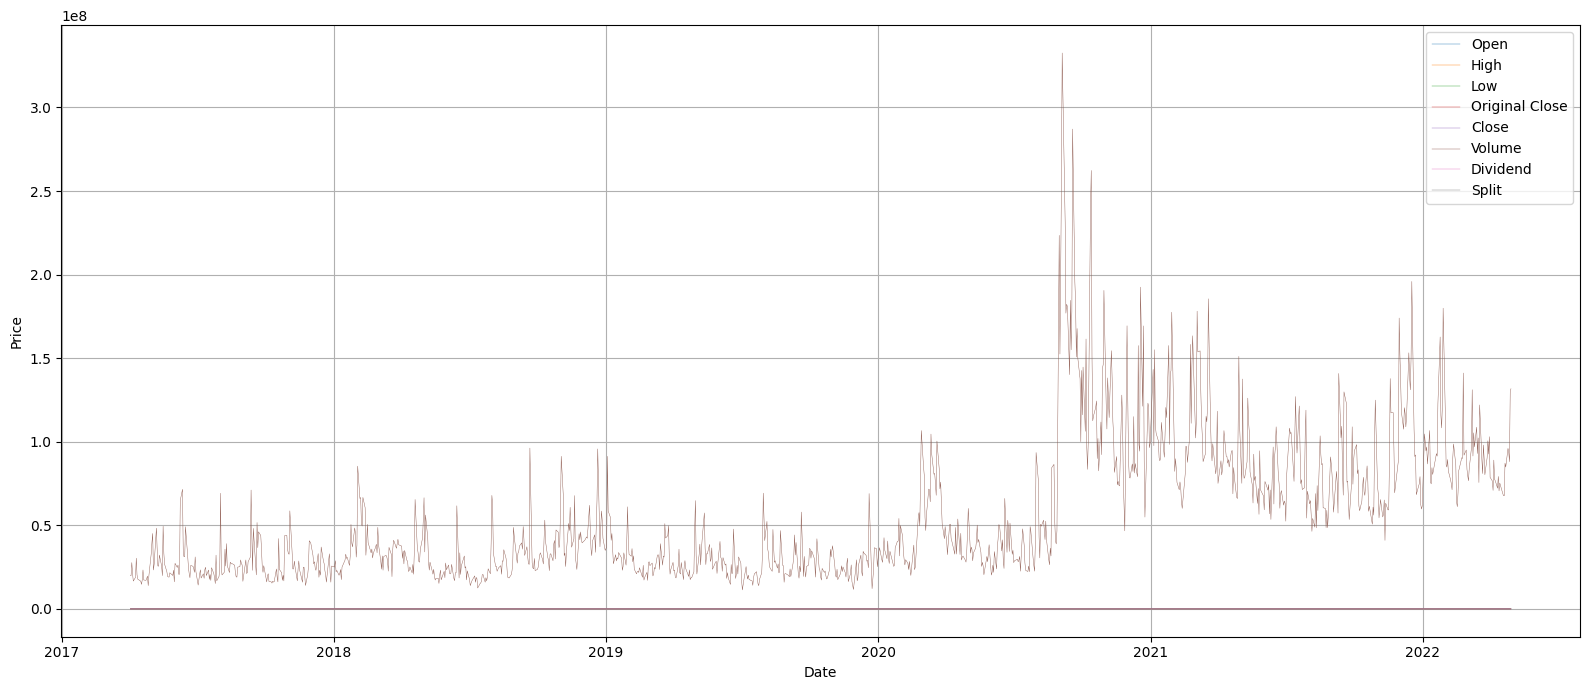

In [149]:
#Open	High	Low	Original Close	Close	Volume	Dividend	Split
visualize(stock_data, 'Visualize_AAPL_Prices.pdf', ['Open', 'High', 'Low', 'Original Close', 'Close', 'Volume', 'Dividend', 'Split'],ylabel="Price")